## Simple Linear Regression

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Importing the dataset and printing the dataframe
df = pd.read_csv('salaries.csv')
print(df.head())

   Years of Experience  Salary
0                  1.1   39343
1                  1.3   46205
2                  1.5   37731
3                  2.0   43525
4                  2.2   39891


In [3]:
#sperating the independent and dependent variable
experience = df['Years of Experience'].values  # Independent variable
salary = df['Salary'].values                  # Dependent variable

In [4]:
print(experience)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


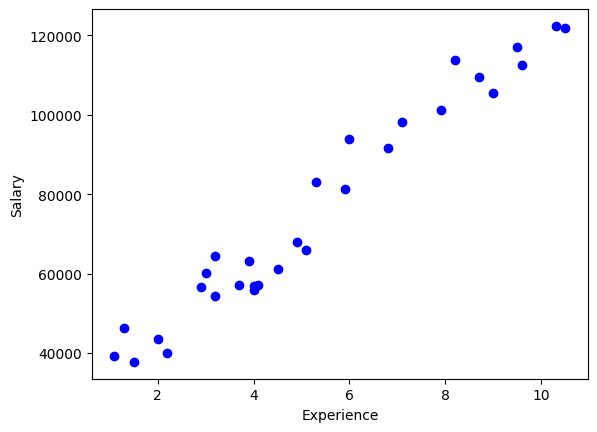

In [5]:
#Scatter plot: it is done to see if a linear relationship exists between the features so that linear model can be used.
plt.scatter(experience, salary, color='blue')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()


NameError: name 'pred' is not defined

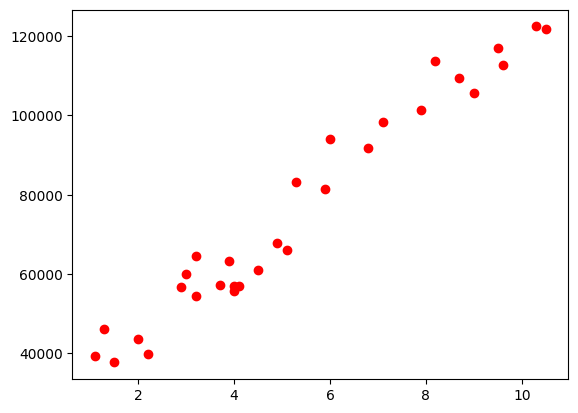

In [6]:
plt.scatter(experience,salary,color = 'red')
plt.plot(experience,pred, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")

In [ ]:
# Calculating the gradients using each parameter
# linear Equation (mathematical formulation) y=a0+a1x
# Initializing the parameters(slope and intercept)
a0=0 # Inrercept
a1=0 #Slope
lr = 0.0001 #Learning Rate: Since many there are multiple gradients it is used to control the update size
iterations = 1000 # total number of training steps
error = [] #initially empty, used to store cost after each iteration which is later used for plotting

# Loop for the Gradient Descent for 1000 iterations
for itr in range(iterations):
    error_cost = 0       # Accumulate cost (MSE)
    cost_a0 = 0          # Gradient accumulator for a0
    cost_a1 = 0          # Gradient accumulator for a1

    for i in range(len(experience)):
        y_pred = a0 + a1 * experience[i]  # predicts salary at a data point
        error_cost += (salary[i] - y_pred) ** 2  
        
        for j in range(len(experience)):
            #Calculating gradients 
            partial_wrt_a0 = -2 * (salary[j] - (a0 + a1 * experience[j])) #gradient for a0
            partial_wrt_a1 = (-2 * experience[j]) * (salary[j] - (a0 + a1 * experience[j])) #gradient for a1
            
            cost_a0 += partial_wrt_a0
            cost_a1 += partial_wrt_a1
        
        #Updating a0 and a1 to reduce the error
        a0 = a0 - lr * cost_a0
        a1 = a1 - lr * cost_a1
            
        print(itr, a0, a1)
    error.append(error_cost)  # saving the total error in the array for the iteration


In [ ]:
#Final intercept and slope after training
print(a0)
print(a1)

In [ ]:
# Plotting the erroe during taining (error (y-axis) vs iteration(x-axis))
plt.figure(figsize=(10,5))
plt.plot(np.arange(1,len(error)+1),error,color='red',linewidth = 5)
plt.title("Iteration v/s Error")
plt.xlabel("Iterations")
plt.ylabel("Error")

In [ ]:
# We see a downward curve here, as MSE decrreases with iterations, showing gradient descent optimizing a0 and a1.
# the flattening line shows that the model has converged, his means the set learning rate (lr=0.001) has been eefective
#Initially, high error due to a0=0 and a1=0 

In [ ]:
# Final prediction with the trained model, using the final a0 and a1
pred = a0+a1*experience
print(pred)

In [ ]:
# Plotting the predictions to visualize the traning line
plt.scatter(experience,salary,color = 'red') #plotting the actual data
plt.plot(experience,pred, color = 'green')   #plotting the regression line(predicted salaries)
plt.xlabel("experience")
plt.ylabel("salary")

#### In the plot, green line close to red dots indicate good fit and laarge gaps indicates poor fit. Steepness of the graphs salary increase per experience year.

In [ ]:
# Calculating the Mean Squared Error(MSE) to measure model frequency
n=len(experience)
error1 = salary - pred  # calculates differnce b/w actual and predicted salaries
se = np.sum(error1 ** 2)
mse = se/n
print("mean squared error is", mse)

#### Linear Regression Model traning using scikit-learn to compare

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
experience = experience.reshape(-1,1)
model = LinearRegression()
model.fit(experience,salary)
salary_pred = model.predict(experience)
Mse = mean_squared_error(salary, salary_pred)
print('Slope', model.coef_)
print("Intercept", model.intercept_)
print("MSE", Mse)